Michał Badura, numer: 407049

In [1]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

#Setting directory of original data
directory = "C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\OriginalData/woj_Swietokrzyskie.csv"
data = pd.read_csv(directory)

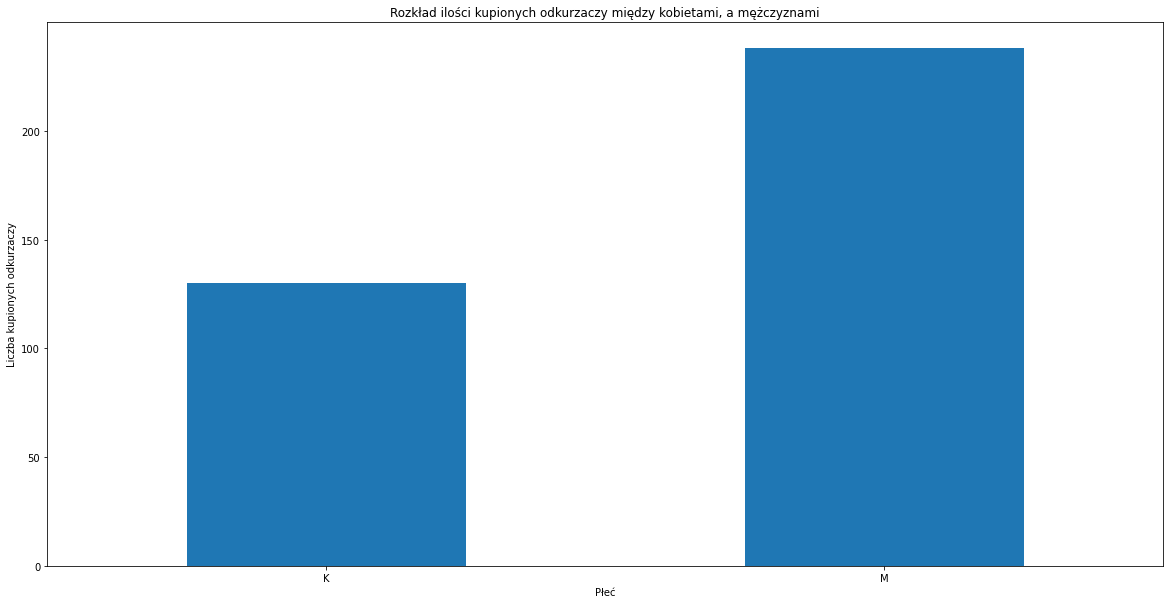

In [2]:
# Sex distribution
data1 = copy.deepcopy(data)
data1 = data1.drop(data1[data1['Płeć kupującego'] == 'bd.'].index)

fig1 = plt.figure()
table1 = data1.pivot_table(index = ['Płeć kupującego'],aggfunc = 'size')
table1.plot.bar(figsize = (20,10), rot = 0, title = 'Rozkład ilości kupionych odkurzaczy między kobietami, a mężczyznami', xlabel = 'Płeć', ylabel = 'Liczba kupionych odkurzaczy')

plt.savefig('C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\Documents\Graphs\sex_distribution/graph1.pdf')
table1.to_csv('C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\AnalysisData\sex_distribution/table1')

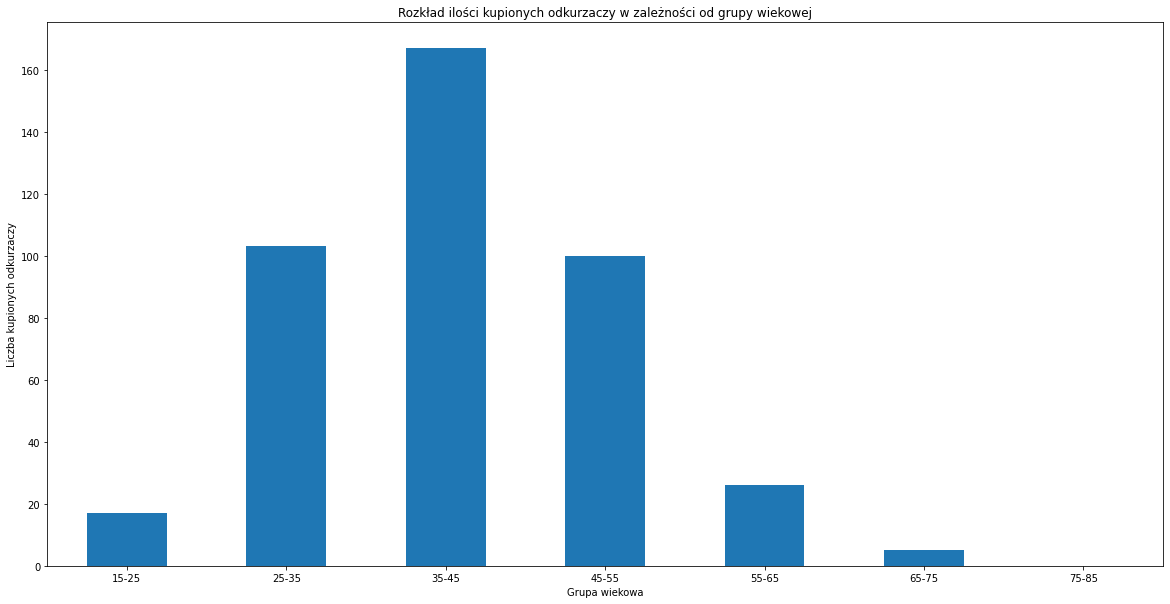

In [3]:
# Age distribution
data2 = copy.deepcopy(data)

bins = [15, 25, 35, 45, 55, 65, 75, 85]
labels = ['15-25', '25-35', '35-45', '45-55','55-65', '65-75', '75-85']
data2 = copy.deepcopy(data)

data2['Grupa wiekowa'] = pd.cut(data2['Wiek kupującego'], bins = bins, labels = labels, right = False)

fig2 = plt.figure()
table2 = data2.pivot_table(index = ['Grupa wiekowa'], aggfunc = 'size')
table2.plot.bar(figsize = (20,10), rot = 0, title = 'Rozkład ilości kupionych odkurzaczy w zależności od grupy wiekowej', xlabel = 'Grupa wiekowa', ylabel = 'Liczba kupionych odkurzaczy')

plt.savefig('C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\Documents\Graphs/age_distribution/graph1.pdf')
table2.to_csv('C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\AnalysisData/age_distribution/table1')

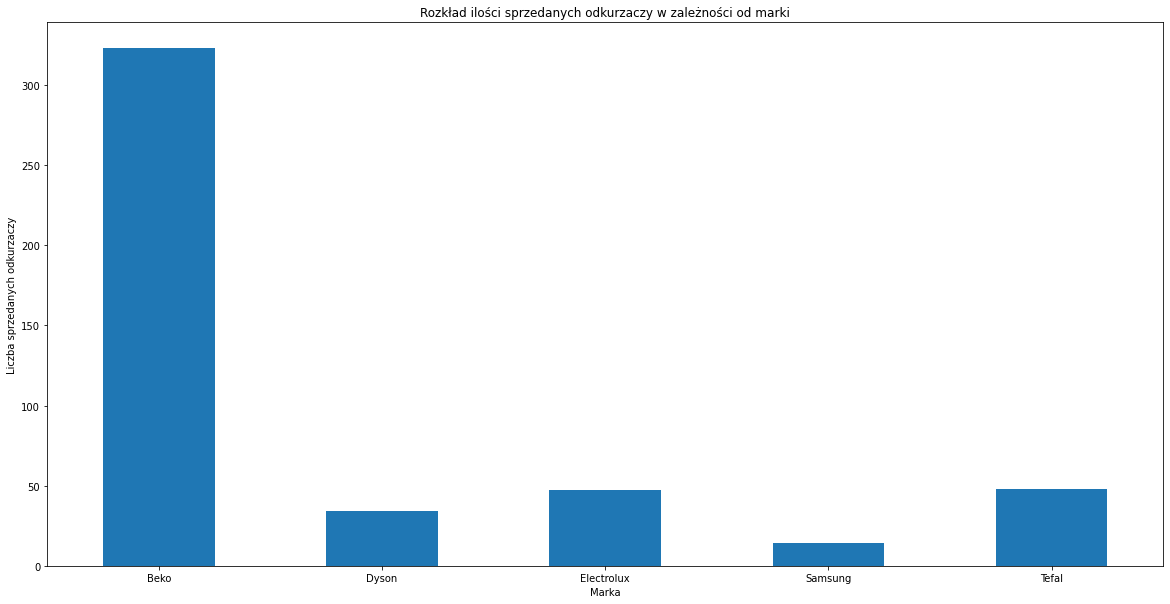

In [4]:
# Amount by brand
data3 = copy.deepcopy(data)

fig3 = plt.figure()
table3 = data3.pivot_table(index = ['Marka'], aggfunc = 'size')
table3.plot.bar(figsize = (20,10), rot = 0, title = 'Rozkład ilości sprzedanych odkurzaczy w zależności od marki', xlabel = 'Marka', ylabel = 'Liczba sprzedanych odkurzaczy')

plt.savefig('C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\Documents\Graphs/brand/graph1.pdf')
table3.to_csv('C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\AnalysisData/brand/table1')

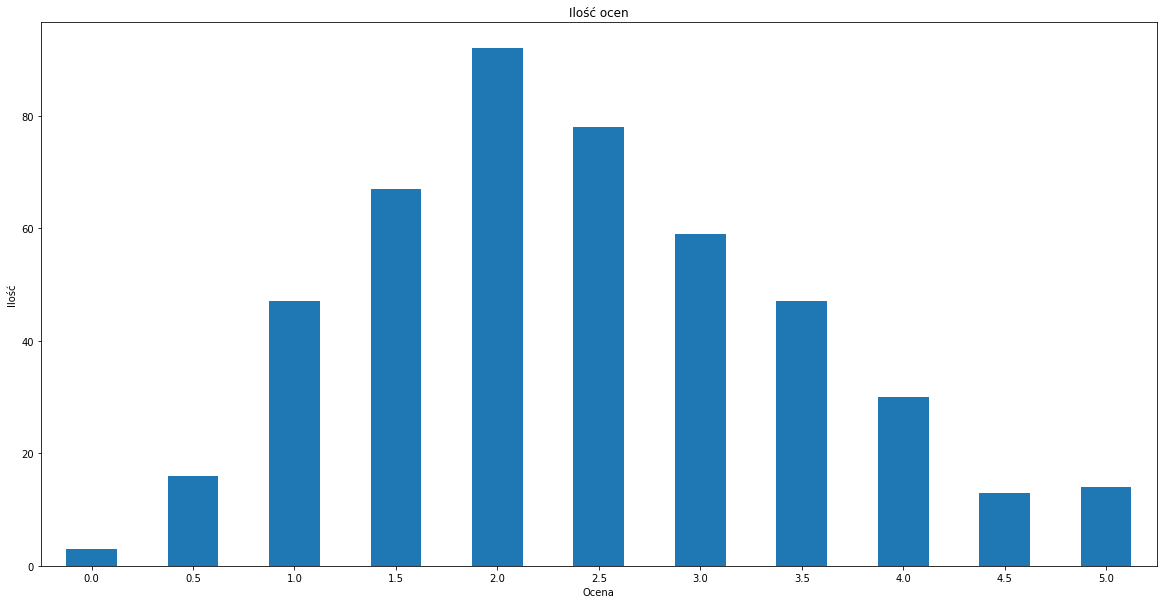

In [5]:
# appraisal
data4 = copy.deepcopy(data)

fig4 = plt.figure()
table4 = data4.pivot_table(index = ['Ocena'], aggfunc = 'size')
table4.plot.bar(figsize = (20,10), rot = 0, title = 'Ilość ocen', xlabel = 'Ocena', ylabel = 'Ilość')

plt.savefig('C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\Documents\Graphs/appraisal/graph1.pdf')
table3.to_csv('C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\AnalysisData/appraisal/table1')

<Figure size 432x288 with 0 Axes>

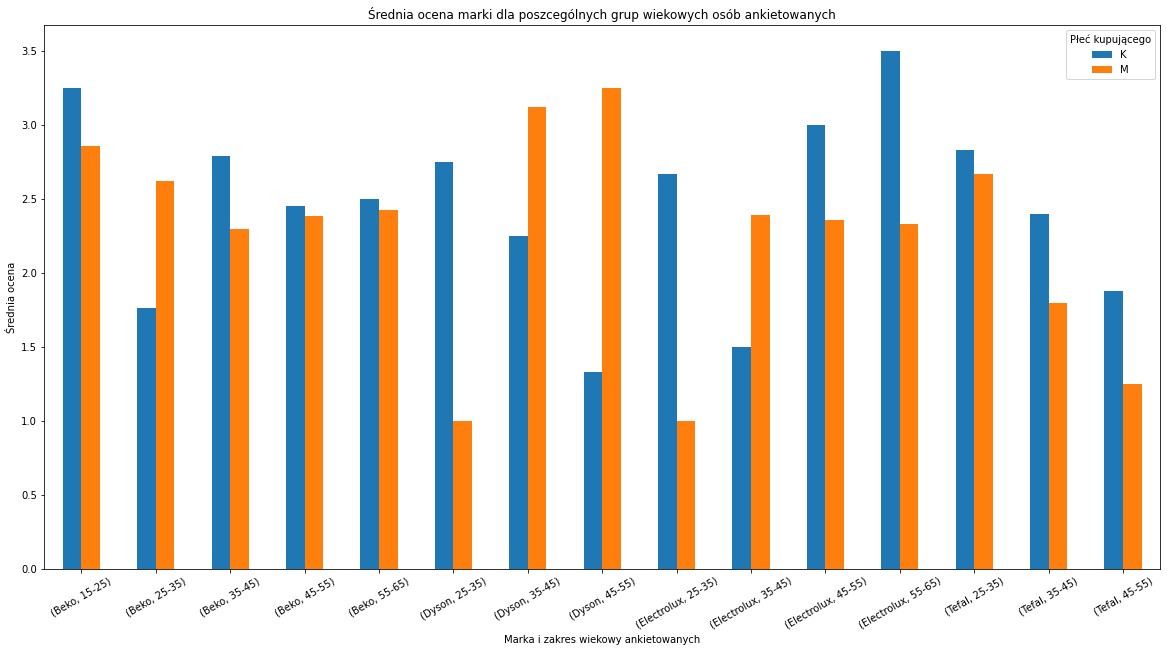

In [6]:
# summary of sex of clients for each brand
data5 = copy.deepcopy(data)
bins = [15, 25, 35, 45, 55, 65, 75, 85]
labels = ['15-25', '25-35', '35-45', '45-55','55-65', '65-75', '75-85']
data5 = pd.read_csv(directory)
data5.drop(columns = ['Dni od zakupu', 'Unnamed: 0'], inplace = True)
data5.drop(data[data['Płeć kupującego'] == 'bd.'].index, inplace = True)
data5 = data5.dropna()
data5 = data5.sort_values(by = ['Marka', 'Płeć kupującego', 'Wiek kupującego', 'Ocena'])

data5['Wiek kupującego'] = data5['Wiek kupującego'].astype(int)
data5['Wiek kupującego'] = pd.cut(x = data5['Wiek kupującego'], bins = bins, labels = labels)
data5 = data5.reindex(columns = ['Marka','Płeć kupującego', 'Wiek kupującego', 'Ocena'])
data5 = data5.rename(columns = {'Wiek kupującego':'Zakres wiekowy'})
data5 = data5.groupby(['Marka','Płeć kupującego', 'Zakres wiekowy'])['Ocena'].mean()
data5 = data5.unstack(1)
data5 = data5.dropna()

fig5 = plt.figure()
data5.plot.bar(figsize = (20,10), rot = 30, title = 'Średnia ocena marki dla poszcególnych grup wiekowych osób ankietowanych', xlabel = 'Marka i zakres wiekowy ankietowanych', ylabel = 'Średnia ocena')
plt.savefig('C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\Documents\Graphs/summary/graph1.pdf')
data5.to_csv('C:\Program Files\Studia/5 semestr\AiBD\lab1\laboratorium-eda-MeHowBadurson\AnalysisData/summary/table1')